# 과제 1: 데이터 알아보기

## 1-1. 데이터 로드
AB_NYC_2019.csv 데이터 파일을 데이터 프레임 형태로 로드하여 df 변수에 저장합니다.

In [10]:
# 실습 pandas 기초(2) 기술통계, 시각화 -> 5-1 참조
import pandas as pd

df = pd.read_csv("AB_NYC_2019.csv", sep=",")

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## 1-2. 데이터 탐색 및 전처리
- 로드한 데이터 일부를 살펴보고, 각 컬럼별 통계값을 뽑습니다.
- 결측치가 있다면 적절한 방법으로 처리합니다.

In [2]:
# row(ㅡ) when axis=0 column(|) when axis=1
print(df.head(10))
print("\n")

print(df.describe()) # 수치형 데이터를 갖는 열만 적용
print("\n")

print(df.count()) # 각 열에 해당하는 데이터 수 확인
print("\n")

# 누락됐으면 True 아니면 False
print(df.isnull().sum(axis=0))
print("\n")

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.9

In [3]:
# 결측치 처리 - (문자열은 앞 행과 같은 속성값으로 치환, 수치형은 평균값으로 치환)
mean_revpm = df['reviews_per_month'].mean(axis=0)

df['name'].fillna(method='ffill',inplace=True)
df['host_name'].fillna(method='ffill',inplace=True)
df['last_review'].fillna(method='ffill',inplace=True)
df['reviews_per_month'].fillna(mean_revpm, inplace=True)

print(df.count())
print("\n")
print(df.isnull().sum(axis=0))

id                                48895
name                              48895
host_id                           48895
host_name                         48895
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       48895
reviews_per_month                 48895
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                

## 1-3. 기술 통계 및 시각화
- 가격 (price) 컬럼에 대한 분포 파악을 위해, 기술 통계값을 뽑고 및 시각화 도구를 사용하여 그림을 그립니다.

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


Axes(0.125,0.11;0.775x0.77)


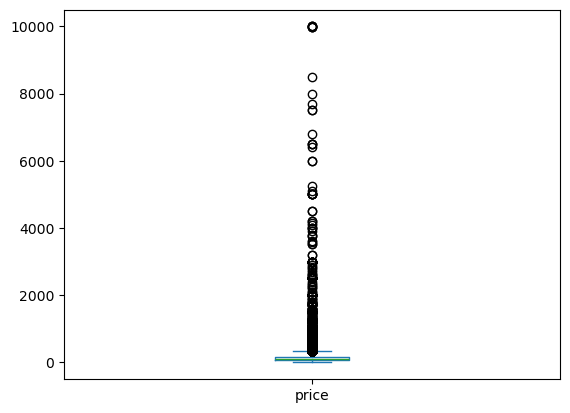

In [4]:
print(df['price'].describe())
print("\n")

print(df['price'].plot(kind="box"))

- price가 0인 데이터를 제거한 데이터 프레임

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
Axes(0.125,0.11;0.775x0.77)


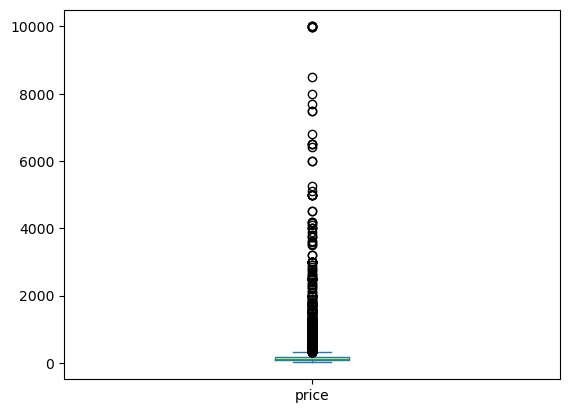

In [5]:
df_nozero = df[df['price'] != 0]
print(df_nozero['price'].describe())
print(df_nozero['price'].plot(kind='box'))

## 1-4. 기술 통계 및 시각화
- 가격과 리뷰 수(number of reviews) 간의 관계를 살펴보기 위해, 관련된 기술 통계값을 뽑고 시각화 도구를 사용하여 그림을 그립니다.

                      price  number_of_reviews
price              1.000000          -0.047954
number_of_reviews -0.047954           1.000000


Axes(0.125,0.11;0.775x0.77)


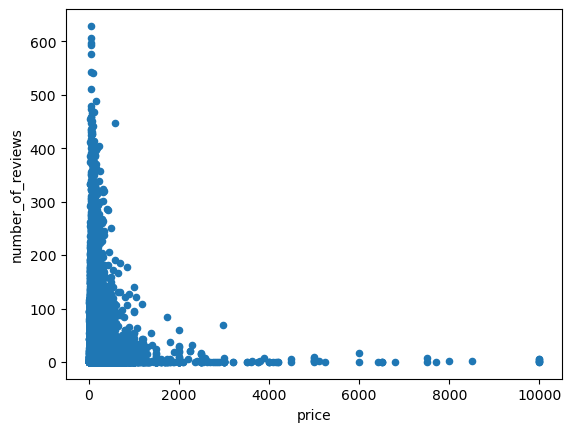

In [6]:
print(df[['price','number_of_reviews']].corr()) # 상관관계는 없음
print("\n")
print(df.plot(x='price', y='number_of_reviews', kind='scatter')) # 산점도를 이용하여 두 데이터 간의 관계 확인

## 1-5. 기술 통계 및 시각화
- neighborhood group과 가격의 관계를 알아보기 위해, 그룹별 가격의 분포에 대한 기술 통계값을 뽑고 시각화 도구를 사용하여 그림을 그려봅니다.

      neighbourhood_group  price
0                Brooklyn    149
1               Manhattan    225
2               Manhattan    150
3                Brooklyn     89
4               Manhattan     80
...                   ...    ...
48890            Brooklyn     70
48891            Brooklyn     40
48892           Manhattan    115
48893           Manhattan     55
48894           Manhattan     90

[48895 rows x 2 columns]


                     price                                       
                     count      sum        mean median min    max
neighbourhood_group                                              
Bronx                 1091    95459   87.496792   65.0   0   2500
Brooklyn             20104  2500600  124.383207   90.0   0  10000
Manhattan            21661  4264527  196.875814  150.0   0  10000
Queens                5666   563867   99.517649   75.0  10  10000
Staten Island          373    42825  114.812332   75.0  13   5000


<Axes: xlabel='neighbourhood_group', ylabel='price'>

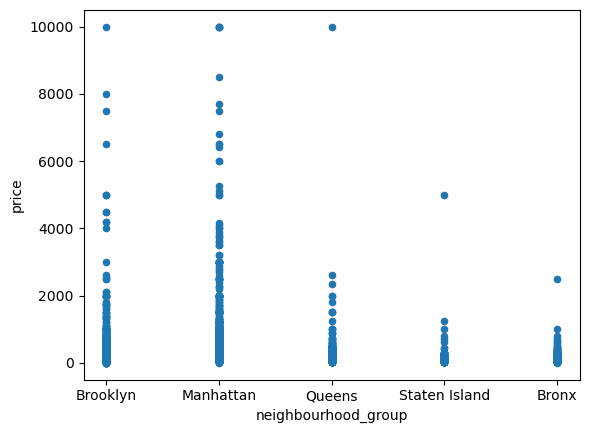

In [13]:
df_np = df.iloc[:,[4, 9]]
print(df_np)
print("\n")
print(df_np.groupby('neighbourhood_group').agg(['count','sum','mean','median','min','max']))


df_np.plot(x='neighbourhood_group',y='price',kind='scatter')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

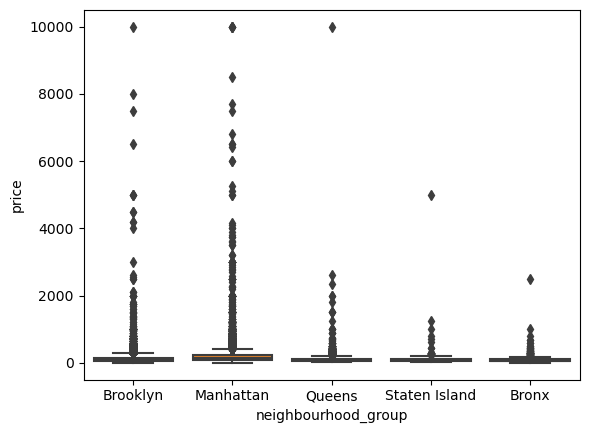

In [8]:
import seaborn as sns

sns.boxplot(data=df, x='neighbourhood_group', y='price')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

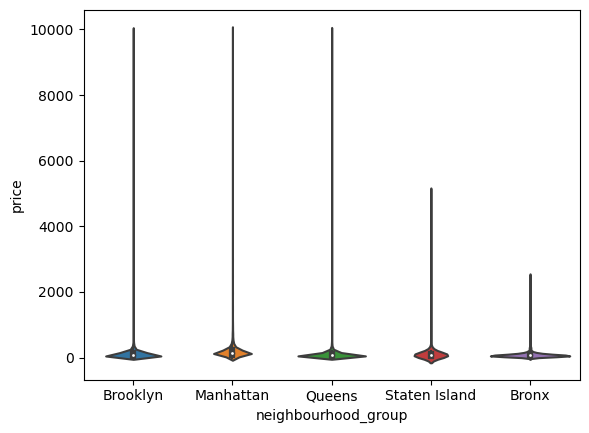

In [9]:
sns.violinplot(data=df, x='neighbourhood_group', y='price')

## 1-6. 그룹별 특징 자유 분석

- neighborhood group 에 따라 어떤 특징이 있는지 자유롭게 분석하고 결과의 의미를 해석하여 제시합니다.

맨해튼이 가장 높은 평균 가격을 가지고 있으며, 그 다음으로 스테튼 아일랜드와 브루클린이 높은 평균 가격을 가지고 있습니다. 퀸즈와 브롱스는 상대적으로 평균 가격이 낮습니다.
스테튼 아일랜드와 브루클린은 가격의 최대값이 상대적으로 높으며, 맨해튼 역시 가격이 높은 숙소가 많은 경향이 있습니다. 퀸즈와 브롱스는 가격의 분포가 상대적으로 낮은 편입니다.
각 동네의 가격 최대값이 다소 높고 이상치가 조금 보입니다.


맨해튼이 다른 동네 숙박시설보다 평균 가격이 높습니다. 이는 맨해튼이 뉴욕의 중심지로서 관광지와 기업들이 밀집되어 있어 있기 때문이라고 볼 수 있습니다. 스테튼 아일랜드와 브루클린은 분포를 보면 가격의 최대값이 높지만, 가격이 높은 숙소들이 상대적으로 적은 편입니다. 이는 고가의 숙소가 존재하더라도 전반적으로 평균 가격이 높은 것은 아니라는 것을 의미할 수 있습니다. 모든 동네에서 이상치가 보이지만 몇 개의 고가 숙소 제외하고 전반적으로 분포가 고른 것으로 보입니다.